# Project 1 - Data Engineering
## 2 Data Exploration and Analysis
This notebook is for the implementation of task "2 Data Exploration and Analysis", as listed in the **Project Instructions**.

<div class="alert alert-success">
<b>Overview:</b><br>
Data Exploration and Analysis consists of the following parts worth 70 points:
<ul>
    <li><b>E1 - Obtain and Scrub</b> (15 points)</li>
    <li><b>E2 - Exploratory data analysis (EDA) </b>(20 points)</li>
    <li><b>E3 - Formulate hypotheses </b>(25 points)</li>
    <li><b>Follow the guidelines for Data Exploration and Analysis below </b>(10 points)</li>
</ul></div>

<div class="alert alert-success">
<b>Guidelines for Data Exploration and Analysis:</b><br>
    <ol>
        <li>Use a single Jupyer notebook for your project.</li>
        <li>Use only Python-code for your project.</li>
        <li>The use of automatic and semi-automatic data analyis tools is not allowed (e. g., PandasGUI, D-Tale, Mito, etc.). Only use packages we used in the coded lectures.</li>
        <li>Upload your resulting work as a zip file containing only a single jupyter notebook and required files to run the notebook. </li>
        <li>All code cells in your notebook must be runnable without errors or warnings (e. g., deprecated functions). Each error/warning subtracts -2 points (up to the full 10 points for following the  guidelines).</li>
        <li>Use only relative paths in your project.</li>
        <li>Avoid (excessive) code duplication.</li>
        <li>Avoid loops iterating over pandas objects (Series, DataFrames). Explicitly justify each exception via a comment. </li>
        <li>All coded steps in your analysis must be commented.</li>
        <li>All results must be interpreted.</li>
        <li>Keep your code as well as outputs short, precise and readable. Each long or unnecessary output subtracts -2 points (up to the full 10 points for following the project guidelines).</li>
    </ol>
    <b>Late submissions are not accepted and earn you 0 points on the python project. </b>
</div>

## Imports and global settings

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import datetime

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook" # Render plotly plots in VSCode notebook

In [2]:
def percent_difference(a, b):
        return (a - b) / b * 100

## E1 - Obtain and Scrub

### Obtain
Download the dataset and understand both: 
- format: wide vs. long, separaters, decimal points, encoding, etc., and 
- content: what variables are in the columns, what is their meaning?
To this end, identify and download metadata such as headers, category listings, explanatory reports, etc.
### Scrub
The aim of scrub is to create a clean version of the data for further analysis. 
- Load the dataset and take care of dtypes (dates, numbers, categories, etc.). Justify why you don't load/use specific columns.
- Choose an appropriate (Multi-)Index.
- Identify:
    1. missing values and get row and column overviews. Handle missing values, according to column type.
    2. duplicates (justify the used column subset). Remove duplicates - if any.
- Transform to shape (tidy vs. wide) best suited for further analysis.
- Export the clean data to a file for inspection with an external data browser (e.g., MS Excel).
- Provide an overview of the clean dataset:
    1. show the dtypes
    2. quantitative column descriptions: 
        1. number of unique values, counts for categorical columns, 
        2. range and median for numeric columns

### E1 Implementation

#### Loading and inspecting the data

In [3]:
df = pd.read_csv('OGD_fkfzul0759_OD_PkwNZL_1.csv', sep=';')
c_A10_0 = pd.read_csv('OGD_fkfzul0759_OD_PkwNZL_1_C-A10-0.csv', sep=';')
c_EK7_0 = pd.read_csv('OGD_fkfzul0759_OD_PkwNZL_1_C-EK7-0.csv', sep=';')
c_J59_0 = pd.read_csv('OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv', sep=';')
header = pd.read_csv('OGD_fkfzul0759_OD_PkwNZL_1_HEADER.csv', sep=';')

In [4]:
df.head(3)

C-J59-0     C-A10-0 C-EK7-0  F-ISIS-1
0  J59-225  A10-200805   EK7-1         5
1  J59-225  A10-200806   EK7-1         4
2  J59-225  A10-200807   EK7-1        20

In [5]:
c_A10_0.head(3)

code          name  Unnamed: 2        en_name  de_desc  de_link  \
0  A10-200001   Jänner 2000         NaN   January 2000      NaN      NaN   
1  A10-200002  Februar 2000         NaN  February 2000      NaN      NaN   
2  A10-200003     März 2000         NaN     March 2000      NaN      NaN   

   en_desc  en_link  de_syn  en_syn  
0      NaN      NaN     NaN     NaN  
1      NaN      NaN     NaN     NaN  
2      NaN      NaN     NaN     NaN

In [6]:
c_EK7_0.head(3)

code                name  Unnamed: 2         en_name  de_desc  de_link  \
0  EK7-1  Personenkraftwagen         NaN  Passenger cars      NaN      NaN   

   en_desc  en_link  de_syn  en_syn  
0      NaN      NaN     NaN     NaN

In [7]:
c_J59_0.head(3)

code                     name  Unnamed: 2                  en_name  \
0    J59-1           Adler <040080>         NaN           Adler <040080>   
1  J59-225          Abarth <070022>         NaN          Abarth <070022>   
2  J59-209  Achleitner (A) <010050>         NaN  Achleitner (A) <010050>   

  de_desc  de_link en_desc  en_link  de_syn  en_syn  
0     NaN      NaN     NaN      NaN     NaN     NaN  
1     NaN      NaN     NaN      NaN     NaN     NaN  
2     NaN      NaN     NaN      NaN     NaN     NaN

In [8]:
header.head(3)

code                name                en_name  Unnamed: 3  Unnamed: 4  \
0  C-J59-0          Pkw-Marken    Passenger car makes         NaN         NaN   
1  C-A10-0  Zeit (Monatswerte)  Time (monthly values)         NaN         NaN   
2  C-EK7-0            Fahrzeug                    NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN

#### Removing NaN Columns

Here I drop all columns, which only contain NaN values.

In [9]:
c_A10_0.dropna(axis=1, how='all', inplace=True)
c_EK7_0.dropna(axis=1, how='all', inplace=True)
c_J59_0.dropna(axis=1, how='all', inplace=True)
header.dropna(axis=1, how='all', inplace=True)

In [10]:
df.head(3)

C-J59-0     C-A10-0 C-EK7-0  F-ISIS-1
0  J59-225  A10-200805   EK7-1         5
1  J59-225  A10-200806   EK7-1         4
2  J59-225  A10-200807   EK7-1        20

In [11]:
c_A10_0.head(3)

code          name        en_name
0  A10-200001   Jänner 2000   January 2000
1  A10-200002  Februar 2000  February 2000
2  A10-200003     März 2000     March 2000

In [12]:
c_EK7_0.head(3)

code                name         en_name
0  EK7-1  Personenkraftwagen  Passenger cars

In [13]:
c_J59_0.head(3)

code                     name                  en_name de_desc en_desc
0    J59-1           Adler <040080>           Adler <040080>     NaN     NaN
1  J59-225          Abarth <070022>          Abarth <070022>     NaN     NaN
2  J59-209  Achleitner (A) <010050>  Achleitner (A) <010050>     NaN     NaN

In [14]:
header.head(3)

code                name                en_name
0  C-J59-0          Pkw-Marken    Passenger car makes
1  C-A10-0  Zeit (Monatswerte)  Time (monthly values)
2  C-EK7-0            Fahrzeug                    NaN

#### Cleaning each table

##### c_J59_0

In [15]:
c_J59_0

code                       name                  en_name  \
0      J59-1             Adler <040080>           Adler <040080>   
1    J59-225            Abarth <070022>          Abarth <070022>   
2    J59-209    Achleitner (A) <010050>  Achleitner (A) <010050>   
3      J59-2              Aero <100180>            Aero <100180>   
4      J59-3        Alfa Romeo <070300>      Alfa Romeo <070300>   
..       ...                        ...                      ...   
300  J59-125          Wolseley <059740>        Wolseley <059740>   
301  J59-126            Zagato <079880>          Zagato <079880>   
302  J59-127           Zastava <169900>         Zastava <169900>   
303  J59-128          Sonstige <..9999>          Others <..9999>   
304    J59-0  Nicht klassifizierbar <0>     Not classifiable <0>   

                                               de_desc  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
300                                                NaN   
301                                                NaN   
302                                                NaN   
303  Die beiden Punkte innerhalb der Kennzahl stehe...   
304                                                NaN   

                                               en_desc  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
300                                                NaN  
301                                                NaN  
302                                                NaN  
303  The two dots within a code stand for '01' to '...  
304                                                NaN  

[305 rows x 5 columns]

In [16]:
# remove code in <> brackets from name column
c_J59_0['name'] = c_J59_0['name'].str.replace(r'<.*?>', '', regex=True)

if c_J59_0['name'].duplicated().any():
    print("At least one name appears twice.")
else:
    print("No name appears twice.")

c_J59_0


No name appears twice.


code                    name                  en_name  \
0      J59-1                  Adler            Adler <040080>   
1    J59-225                 Abarth           Abarth <070022>   
2    J59-209         Achleitner (A)   Achleitner (A) <010050>   
3      J59-2                   Aero             Aero <100180>   
4      J59-3             Alfa Romeo       Alfa Romeo <070300>   
..       ...                     ...                      ...   
300  J59-125               Wolseley         Wolseley <059740>   
301  J59-126                 Zagato           Zagato <079880>   
302  J59-127                Zastava          Zastava <169900>   
303  J59-128               Sonstige           Others <..9999>   
304    J59-0  Nicht klassifizierbar      Not classifiable <0>   

                                               de_desc  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
300                                                NaN   
301                                                NaN   
302                                                NaN   
303  Die beiden Punkte innerhalb der Kennzahl stehe...   
304                                                NaN   

                                               en_desc  
0                                                  NaN  
1                                                  NaN  
2                                                  NaN  
3                                                  NaN  
4                                                  NaN  
..                                                 ...  
300                                                NaN  
301                                                NaN  
302                                                NaN  
303  The two dots within a code stand for '01' to '...  
304                                                NaN  

[305 rows x 5 columns]

In [17]:
# Checking which rows in the columns de_desc and en_desc are not empty
print(c_J59_0[c_J59_0['de_desc'].notna()][['de_desc']])
print(c_J59_0[c_J59_0['en_desc'].notna()][['en_desc']])

                                               de_desc
225  Bis 1983 in Ausprägung 96 'Renault' enthalten\r\n
303  Die beiden Punkte innerhalb der Kennzahl stehe...
                                               en_desc
225        Until 1983 included in element 96 'Renault'
303  The two dots within a code stand for '01' to '...


In [18]:
c_J59_0.iloc[225]
# Renault Saviem is included in Renault until 1983
# Because the data starts in January 2000 this is not relevant for my analysis

code                                                  J59-46
name                                         Renault Saviem 
en_name                              Renault Saviem <068070>
de_desc    Bis 1983 in Ausprägung 96 'Renault' enthalten\r\n
en_desc          Until 1983 included in element 96 'Renault'
Name: 225, dtype: object

In [19]:
print(c_J59_0.iloc[302]["de_desc"])
c_J59_0.iloc[302]

# The description is for the car brand code which I already dropped
# So it is not relevant for my analysis as well

nan


code                J59-127
name               Zastava 
en_name    Zastava <169900>
de_desc                 NaN
en_desc                 NaN
Name: 302, dtype: object

In [20]:
# I drop the two columns because they are not relevant for my analysis
c_J59_0.drop(columns=['en_name', 'de_desc', 'en_desc'], inplace=True)

c_J59_0

code                    name
0      J59-1                  Adler 
1    J59-225                 Abarth 
2    J59-209         Achleitner (A) 
3      J59-2                   Aero 
4      J59-3             Alfa Romeo 
..       ...                     ...
300  J59-125               Wolseley 
301  J59-126                 Zagato 
302  J59-127                Zastava 
303  J59-128               Sonstige 
304    J59-0  Nicht klassifizierbar 

[305 rows x 2 columns]

In [21]:
# Grouping of brands that diffrent in the country
# I assume that these are other producers of the same brand
# There is no metadata for this so I have to assume it
c_J59_0['name'] = c_J59_0['name'].str.replace(r'\(.*\)', '', regex=True)
c_J59_0['name'] = c_J59_0['name'].str.rstrip()

c_J59_0


code                   name
0      J59-1                  Adler
1    J59-225                 Abarth
2    J59-209             Achleitner
3      J59-2                   Aero
4      J59-3             Alfa Romeo
..       ...                    ...
300  J59-125               Wolseley
301  J59-126                 Zagato
302  J59-127                Zastava
303  J59-128               Sonstige
304    J59-0  Nicht klassifizierbar

[305 rows x 2 columns]

##### c_A10_0

In [22]:
c_A10_0

code            name         en_name
0    A10-200001     Jänner 2000    January 2000
1    A10-200002    Februar 2000   February 2000
2    A10-200003       März 2000      March 2000
3    A10-200004      April 2000      April 2000
4    A10-200005        Mai 2000        May 2000
..          ...             ...             ...
280  A10-202305        Mai 2023        May 2023
281  A10-202306       Juni 2023       June 2023
282  A10-202307       Juli 2023       July 2023
283  A10-202308     August 2023     August 2023
284  A10-202309  September 2023  September 2023

[285 rows x 3 columns]

In [23]:
# drop column name
c_A10_0.drop(columns=['name'], inplace=True)

In [24]:
# clean column en_name (extract only month + year, because some values contain a symbol)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
c_A10_0['en_name'] = c_A10_0['en_name'].str.extract(f"({'|'.join(months)}) (\d{{4}})").apply(lambda x: f"{x[0]} {x[1]}", axis=1)
c_A10_0

code         en_name
0    A10-200001    January 2000
1    A10-200002   February 2000
2    A10-200003      March 2000
3    A10-200004      April 2000
4    A10-200005        May 2000
..          ...             ...
280  A10-202305        May 2023
281  A10-202306       June 2023
282  A10-202307       July 2023
283  A10-202308     August 2023
284  A10-202309  September 2023

[285 rows x 2 columns]

In [25]:
# convert en_name column to datetime range
c_A10_0['en_name'] = pd.to_datetime(c_A10_0['en_name'], format='%B %Y')

c_A10_0

code    en_name
0    A10-200001 2000-01-01
1    A10-200002 2000-02-01
2    A10-200003 2000-03-01
3    A10-200004 2000-04-01
4    A10-200005 2000-05-01
..          ...        ...
280  A10-202305 2023-05-01
281  A10-202306 2023-06-01
282  A10-202307 2023-07-01
283  A10-202308 2023-08-01
284  A10-202309 2023-09-01

[285 rows x 2 columns]

##### c_EK7_0

In [26]:
c_EK7_0

code                name         en_name
0  EK7-1  Personenkraftwagen  Passenger cars

In [27]:
# drop en_name column
c_EK7_0.drop(columns=['en_name'], inplace=True)

c_EK7_0

code                name
0  EK7-1  Personenkraftwagen

##### header

In [28]:
header

code                   name                                  en_name
0   C-J59-0             Pkw-Marken                      Passenger car makes
1   C-A10-0     Zeit (Monatswerte)                    Time (monthly values)
2   C-EK7-0               Fahrzeug                                      NaN
3  F-ISIS-1  Anzahl Neuzulassungen  Number of registrations of new vehicles

In [29]:
# drop column en_name
header.drop(columns=['en_name'], inplace=True)

header

code                   name
0   C-J59-0             Pkw-Marken
1   C-A10-0     Zeit (Monatswerte)
2   C-EK7-0               Fahrzeug
3  F-ISIS-1  Anzahl Neuzulassungen

#### Merging the data

In [30]:
df

C-J59-0     C-A10-0 C-EK7-0  F-ISIS-1
0      J59-225  A10-200805   EK7-1         5
1      J59-225  A10-200806   EK7-1         4
2      J59-225  A10-200807   EK7-1        20
3      J59-225  A10-200808   EK7-1        15
4      J59-225  A10-200809   EK7-1        11
...        ...         ...     ...       ...
20451  J59-128  A10-201212   EK7-1         1
20452  J59-128  A10-201403   EK7-1         1
20453  J59-128  A10-201607   EK7-1         1
20454  J59-128  A10-201906   EK7-1         1
20455  J59-128  A10-201907   EK7-1         1

[20456 rows x 4 columns]

In [31]:
# match column names to the values from header dataframe
new_columns = []

for col in df.columns:
    new_columns.append(header[header['code'] == col]['name'].values[0])

df.columns = new_columns
df

Pkw-Marken Zeit (Monatswerte) Fahrzeug  Anzahl Neuzulassungen
0        J59-225         A10-200805    EK7-1                      5
1        J59-225         A10-200806    EK7-1                      4
2        J59-225         A10-200807    EK7-1                     20
3        J59-225         A10-200808    EK7-1                     15
4        J59-225         A10-200809    EK7-1                     11
...          ...                ...      ...                    ...
20451    J59-128         A10-201212    EK7-1                      1
20452    J59-128         A10-201403    EK7-1                      1
20453    J59-128         A10-201607    EK7-1                      1
20454    J59-128         A10-201906    EK7-1                      1
20455    J59-128         A10-201907    EK7-1                      1

[20456 rows x 4 columns]

In [32]:
# merging all dataframes
df['Pkw-Marken'] = pd.merge(df, c_J59_0, left_on='Pkw-Marken', right_on='code', how='left')['name']
df['Zeit (Monatswerte)'] = pd.merge(df, c_A10_0, left_on='Zeit (Monatswerte)', right_on='code', how='left')['en_name']
df['Fahrzeug'] = pd.merge(df, c_EK7_0, left_on='Fahrzeug', right_on='code', how='left')['name']
df

Pkw-Marken Zeit (Monatswerte)            Fahrzeug  Anzahl Neuzulassungen
0         Abarth         2008-05-01  Personenkraftwagen                      5
1         Abarth         2008-06-01  Personenkraftwagen                      4
2         Abarth         2008-07-01  Personenkraftwagen                     20
3         Abarth         2008-08-01  Personenkraftwagen                     15
4         Abarth         2008-09-01  Personenkraftwagen                     11
...          ...                ...                 ...                    ...
20451   Sonstige         2012-12-01  Personenkraftwagen                      1
20452   Sonstige         2014-03-01  Personenkraftwagen                      1
20453   Sonstige         2016-07-01  Personenkraftwagen                      1
20454   Sonstige         2019-06-01  Personenkraftwagen                      1
20455   Sonstige         2019-07-01  Personenkraftwagen                      1

[20456 rows x 4 columns]

In [33]:
# Because of grouping the car brands earlier, there are some duplicates
# In the following two cells I am inspecting and aggregating those duplicates
df[df.duplicated(subset=['Pkw-Marken', 'Zeit (Monatswerte)'], keep=False)].sort_values(by=['Pkw-Marken', 'Zeit (Monatswerte)'])

Pkw-Marken Zeit (Monatswerte)            Fahrzeug  Anzahl Neuzulassungen
461         Audi         2000-01-01  Personenkraftwagen                   1215
746         Audi         2000-01-01  Personenkraftwagen                     74
462         Audi         2000-02-01  Personenkraftwagen                   1094
747         Audi         2000-02-01  Personenkraftwagen                     54
463         Audi         2000-03-01  Personenkraftwagen                   1410
...          ...                ...                 ...                    ...
19712      Volvo         2023-08-01  Personenkraftwagen                    284
19766      Volvo         2023-08-01  Personenkraftwagen                      3
19428      Volvo         2023-09-01  Personenkraftwagen                     15
19713      Volvo         2023-09-01  Personenkraftwagen                    246
19767      Volvo         2023-09-01  Personenkraftwagen                      4

[12087 rows x 4 columns]

In [34]:
df = df.groupby(['Pkw-Marken', 'Zeit (Monatswerte)', 'Fahrzeug'], as_index=False)['Anzahl Neuzulassungen'].sum()
df

Pkw-Marken Zeit (Monatswerte)            Fahrzeug  Anzahl Neuzulassungen
0         Abarth         2008-05-01  Personenkraftwagen                      5
1         Abarth         2008-06-01  Personenkraftwagen                      4
2         Abarth         2008-07-01  Personenkraftwagen                     20
3         Abarth         2008-08-01  Personenkraftwagen                     15
4         Abarth         2008-09-01  Personenkraftwagen                     11
...          ...                ...                 ...                    ...
12607   Wiesmann         2008-04-01  Personenkraftwagen                      1
12608   Wiesmann         2008-05-01  Personenkraftwagen                      1
12609   Wiesmann         2008-07-01  Personenkraftwagen                      1
12610   Wiesmann         2009-03-01  Personenkraftwagen                      1
12611   Wiesmann         2010-07-01  Personenkraftwagen                      2

[12612 rows x 4 columns]

### Overview of the clean dataset

In [35]:
df.dtypes

Pkw-Marken                       object
Zeit (Monatswerte)       datetime64[ns]
Fahrzeug                         object
Anzahl Neuzulassungen             int64
dtype: object

In [36]:
df.isna().sum()

Pkw-Marken               0
Zeit (Monatswerte)       0
Fahrzeug                 0
Anzahl Neuzulassungen    0
dtype: int64

In [37]:
df.nunique()

Pkw-Marken                105
Zeit (Monatswerte)        285
Fahrzeug                    1
Anzahl Neuzulassungen    2352
dtype: int64

In [38]:
df['Anzahl Neuzulassungen'].sum()

7213112

In [39]:
df['Anzahl Neuzulassungen'].describe()

count   12612.0000
mean      571.9245
std       842.7328
min         1.0000
25%        16.0000
50%       208.0000
75%       883.0000
max      7739.0000
Name: Anzahl Neuzulassungen, dtype: float64

In [40]:
# Important to know is, that the new car registrations are values for each brand in each month
df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].describe()

count     285.0000
mean    25309.1649
std      5408.8333
min     10654.0000
25%     21196.0000
50%     25257.0000
75%     29528.0000
max     38015.0000
Name: Anzahl Neuzulassungen, dtype: float64

In [41]:
df.groupby(['Pkw-Marken'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].describe()

count       105.0000
mean      68696.3048
std      166478.8781
min           1.0000
25%          13.0000
50%         666.0000
75%       27026.0000
max     1234154.0000
Name: Anzahl Neuzulassungen, dtype: float64

In [42]:
df.sort_values(by=['Anzahl Neuzulassungen'], ascending=False).head(10)

Pkw-Marken Zeit (Monatswerte)            Fahrzeug  Anzahl Neuzulassungen
12250         VW         2018-06-01  Personenkraftwagen                   7739
12175         VW         2012-03-01  Personenkraftwagen                   6731
12178         VW         2012-06-01  Personenkraftwagen                   6712
12043         VW         2001-03-01  Personenkraftwagen                   6666
12032         VW         2000-04-01  Personenkraftwagen                   6540
12045         VW         2001-05-01  Personenkraftwagen                   6330
12247         VW         2018-03-01  Personenkraftwagen                   6184
12044         VW         2001-04-01  Personenkraftwagen                   6147
12165         VW         2011-05-01  Personenkraftwagen                   6129
12031         VW         2000-03-01  Personenkraftwagen                   6126

In [43]:
df[df['Pkw-Marken'] == 'VW']['Anzahl Neuzulassungen'].mean(), df[df['Pkw-Marken'] == 'Ferrari']['Anzahl Neuzulassungen'].mean()

(4330.364912280702, 4.810924369747899)

### Dropping Fahrzeug and exporting as .xlsx file

In [44]:
# Because the column Fahrzeug only has one unique value I drop it
df.drop(columns=['Fahrzeug'], inplace=True)

In [45]:
# Export the cleaned dataframe to a xlsx file
df.to_excel('CarRegistrationSince2000.xlsx', index=False)

## E2 - Exploratory data analysis (EDA)
Use the clean dataset and to understand and explore the relationships in the data (numerical, visual, statistical). This includes at least but is not limited to:
- A comprehensive textual description of meaning for relevant fields in the dataset
- Statistical/numerical descriptions and visualization techniques we learned in the course inluding correlations, distributions and groupings of variing degrees.
- Checks for data quality, e. g., completeness, plausibility, outliers
- Handling any identified problems with the data
- If necessary, use additional data wrangling in line with your EDA and only keep what's necessary for the following steps of your analysis with appropriate data granularity and form ("tidy data")

Advanced/bonus:
- Depending on your hypothesis you may want to join external data (e.g., merge external highest education level to existing vaccination data) for additional insights.

Explain all steps taken and your thinking why you deem them necessary.

### Textual description of the dataset

The given dataset contains the number of new passenger car registrations by brand in Austria.

The data has been made available in the form of five csv-files:
* OGD_fkfzul0759_OD_PkwNZL_1.csv (Main File)
* OGD_fkfzul0759_OD_PkwNZL_1_C-A10-0.csv (Months)
* OGD_fkfzul0759_OD_PkwNZL_1_C-EK7-0.csv (Fahrzeug)
* OGD_fkfzul0759_OD_PkwNZL_1_C-J59-0.csv (Car makes)
* OGD_fkfzul0759_OD_PkwNZL_1_HEADER.csv (Column names)

The Main file contains all the data, but the data, as well as the column name is encoded.
It consists of 4 columns, which are explained in the Header file (Passenger car makes; Time (monthly values); Fahrzeug; Number of registrations of new vehicles).
The values are defined in the corresponding csv files:
* C-A10-0 = Time (monthly values)
* C-EK7-0 = Fahrzeug
* C-J59-0 = Passenger car makes

Before combining the files, I dropped all empty or duplicate columns (duplicate because there often were german and english names) as well as the descriptions, because they were not containign relevant information.

After merging all five files, I get a cleaned and full version of the dataset:

I then drop the column "Fahrzeug" because it only contains the single value "Passenger cars" which makes sense for the dataset but therefore does not contain relevant information for further analysis.

The data is provided as amonthly time series as of January 2000 up to September 2023.

The dataset contains 12612 rows.

It includes 105 brands and a total number of 7.213.112 car registrations.

### Statistical and numerical description

The number of car registrations fluctuate a lot between car makes. For example the mean car registrations for VW is 4330.36 while the mean for Ferrari is 4.81. But the value for Ferrari is also not correct because if no new Ferraris got registered in a month there is no data row, so the 0 values do not play into the mean.

To comprehend for that problem and to provide a mroe useful overview I analyze the column "Anzahl Neuzulassungen" by aggregating the values for each month (calculated in E1):
* Count: 285 (23 years * 12 months + 9 months (2023 is not complete yet))
* Mean: 25309.16
* Median: 25257
* Std: 5408
* Min: 10654
* Max: 38015

In [46]:
df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()

Zeit (Monatswerte)  Anzahl Neuzulassungen
0           2000-01-01                  26975
1           2000-02-01                  23420
2           2000-03-01                  35192
3           2000-04-01                  32666
4           2000-05-01                  32672
..                 ...                    ...
280         2023-05-01                  20623
281         2023-06-01                  24511
282         2023-07-01                  17566
283         2023-08-01                  18790
284         2023-09-01                  19840

[285 rows x 2 columns]

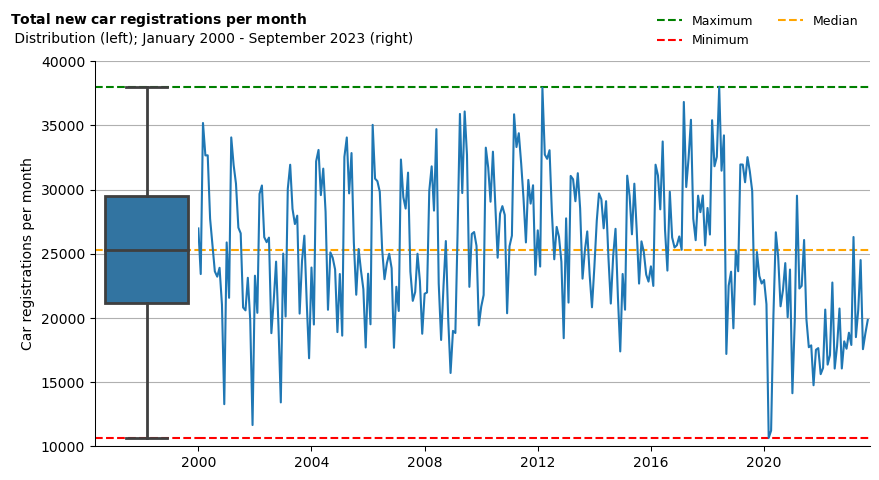

In [47]:
# Creating a data description plot for the report

fig = plt.figure(figsize=(10,5))
fig.suptitle(r'$\bf{Total}$ $\bf{new}$ $\bf{car}$ $\bf{registrations}$ $\bf{per}$ $\bf{month}$'+ '\n Distribution (left); January 2000 - September 2023 (right)', fontsize=10, x=0.04, ha='left')

gs = fig.add_gridspec(10, 15)
ax1 = fig.add_subplot(gs[:,0:2])
ax2 = fig.add_subplot(gs[:,2:], sharey=ax1)

ax1.grid(axis='y')

sns.boxplot(
    y=df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'],
    #color=".5",
    ax=ax1,
    linewidth=2,
)

ax1.set_axisbelow(True)

ax1.set_ylabel('Car registrations per month')

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_linewidth(0.75)
ax1.spines['left'].set_linewidth(0.75)

ax1.set_ylim(10000,40000)

ax1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)


line = sns.lineplot(
    df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum(),
    y='Anzahl Neuzulassungen',
    x='Zeit (Monatswerte)',
    ax=ax2,
)

ax2.set_xlabel('')
ax2.set_ylabel('')

#ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 1.1), ncol=2, fontsize=9, facecolor='white', framealpha=1, edgecolor='white')

ax2.grid(axis='y')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_tick_params(width=0.75)
ax2.yaxis.set_tick_params(width=0.75)
ax2.spines['bottom'].set_linewidth(0.75)
ax2.spines['left'].set_color('none')

ax2.set_xlim(datetime.date(2000, 1, 1), datetime.date(2023, 9, 30))

ax2.tick_params(
    axis='y',
    which='both',
    left=False,
    labelleft=False)

for ax in [ax1, ax2]:
    ax.axhline(y=df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].max(),linewidth=1.5,zorder=0, color='g', linestyle='--', label='Maximum')
    ax.axhline(y=df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].min(),linewidth=1.5,zorder=0, color='r', linestyle='--', label='Minimum')
    #ax.axhline(y=df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].mean(),linewidth=1,zorder=0, color='b', label='Mean')
    ax.axhline(y=df.groupby(['Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()['Anzahl Neuzulassungen'].median(),linewidth=1.5,zorder=0, color='orange', linestyle='--', label='Median')

plt.subplots_adjust(wspace=0, hspace=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.15), ncol=2, fontsize=9, facecolor='white', framealpha=1, edgecolor='white')

plt.savefig("monthly_car_registrations.png")

plt.show()

### Additional dataset operations

#### Identifying the top car brands

In [48]:
# Identifying all car brands that had the most new car registrations in a month

top_brands = []
for date in df['Zeit (Monatswerte)'].unique():
    brand = df[df['Zeit (Monatswerte)'] == date].sort_values(by='Anzahl Neuzulassungen', ascending=False).iloc[0]['Pkw-Marken']
    if brand not in top_brands:
        top_brands.append(brand)

#all brands that had the highest number of new registrations in a month
#top_brands

In [49]:
# Identifying all car brands that were in the top 5 of new car registrations in a month

top5_brands = []
for date in df['Zeit (Monatswerte)'].unique():
    max_brands = df[df['Zeit (Monatswerte)'] == date].sort_values(by='Anzahl Neuzulassungen', ascending=False).iloc[0:5]['Pkw-Marken'].values
    for brand in max_brands:
        if brand not in top5_brands:
            top5_brands.append(brand)

#top5_brands

#### Aggregating to monthly/yearly data

In [50]:
df_yearly = df.groupby(['Pkw-Marken', df['Zeit (Monatswerte)'].dt.year])['Anzahl Neuzulassungen'].sum().reset_index()
df_yearly.rename(columns={'Zeit (Monatswerte)': 'Jahr'}, inplace=True)
df_yearly = df_yearly[df_yearly['Jahr'] != 2023] # exclude 2023 because data only contains a part of the year

In [51]:
df.set_index('Zeit (Monatswerte)', inplace=True)

monthly_registrations = df['Anzahl Neuzulassungen'].resample('M').sum()
monthly_registrations.index.to_period('M')
monthly_registrations

Zeit (Monatswerte)
2000-01-31    26975
2000-02-29    23420
2000-03-31    35192
2000-04-30    32666
2000-05-31    32672
              ...  
2023-05-31    20623
2023-06-30    24511
2023-07-31    17566
2023-08-31    18790
2023-09-30    19840
Freq: M, Name: Anzahl Neuzulassungen, Length: 285, dtype: int64

In [52]:
yearly_registrations = df['Anzahl Neuzulassungen'].resample('Y').sum()
yearly_registrations.index.to_period('Y')
yearly_registrations

Zeit (Monatswerte)
2000-12-31    309427
2001-12-31    293528
2002-12-31    279493
2003-12-31    300121
2004-12-31    311292
2005-12-31    307915
2006-12-31    308594
2007-12-31    298182
2008-12-31    293697
2009-12-31    319403
2010-12-31    328563
2011-12-31    356145
2012-12-31    336010
2013-12-31    319035
2014-12-31    303318
2015-12-31    308555
2016-12-31    329604
2017-12-31    353320
2018-12-31    341068
2019-12-31    329363
2020-12-31    248740
2021-12-31    239803
2022-12-31    215050
2023-12-31    182886
Freq: A-DEC, Name: Anzahl Neuzulassungen, dtype: int64

In [53]:
df.reset_index(inplace=True)

#### Car Companies

In [54]:
# Definition of Car Companies (Sources are listed at the end of the notebook)

volkswagen = ['VW', 'Skoda', 'Seat', 'Cupra', 'Audi', 'Lamborghini', 'Bentley', 'Ducati', 'Porsche', 'Bugatti', 'MAN']
toyota = ['Toyota', 'Lexus', 'Daihatsu']
stellantis = ['Abarth', 'Alfa Romeo', 'Chrysler', 'Citroen', 'Dodge', 'DS', 'Fiat', 'Jeep', 'Lancia', 'Maserati', 'Opel', 'Peugeot', 'Ram', 'Vauxhall']
daimler = ['Mercedes', 'Smart', 'Maybach']
ford = ['Ford', 'Lincoln']
general_motors = ['GMC', 'Chevrolet', 'Buick', 'Cadillac']
honda = ['Honda']
tesla = ['Tesla']
re_ni_mi = ['Renault', 'Nissan', 'Infiniti', 'Mitsubishi', 'Dacia', 'Alpine', 'Lada'] # not a company but an alliance and still interesting to examine
bmw = ['BMW', 'Mini', 'Rolls Royce']
hmg = ['Hyundai', 'Kia', 'Genesis']

In [55]:
c_J59_0[c_J59_0['name'].isin(volkswagen)]

code         name
8      J59-5         Audi
9    J59-173         Audi
23    J59-14      Bentley
27   J59-212      Bugatti
49   J59-285        Cupra
144   J59-65  Lamborghini
184  J59-282          MAN
218   J59-92      Porsche
238  J59-131         Seat
243  J59-104        Skoda
293  J59-202           VW
294  J59-122           VW
295  J59-167           VW
296  J59-273           VW

In [56]:
c_J59_0[c_J59_0['name'].str.contains('Mercedes')]

code      name
167  J59-180  Mercedes
168   J59-73  Mercedes
169  J59-142  Mercedes
170  J59-219  Mercedes
171  J59-170  Mercedes

In [57]:
car_companies = {'Volkswagen': volkswagen,
                 'Toyota': toyota,
                 'Stellantis': stellantis,
                 'Daimler': daimler,
                 'Ford': ford,
                 'General Motors': general_motors,
                 'Honda': honda,
                 'Tesla': tesla,
                 'Renault-Nissan-Mitsubishi-Allianz': re_ni_mi,
                 'BMW': bmw,
                 'Hyundai Motor Group': hmg}

rows = []

for company, brands in car_companies.items():
    for brand in brands:
        rows.append({'Brand': brand, 'Company': company})

company_df = pd.DataFrame(rows)


In [58]:
company_df = pd.merge(df, company_df, left_on='Pkw-Marken', right_on='Brand', how='left')
company_df.drop('Brand', axis=1, inplace=True)
company_df['Company'].fillna('Other', inplace=True)
company_df

Zeit (Monatswerte) Pkw-Marken  Anzahl Neuzulassungen     Company
0             2008-05-01     Abarth                      5  Stellantis
1             2008-06-01     Abarth                      4  Stellantis
2             2008-07-01     Abarth                     20  Stellantis
3             2008-08-01     Abarth                     15  Stellantis
4             2008-09-01     Abarth                     11  Stellantis
...                  ...        ...                    ...         ...
12607         2008-04-01   Wiesmann                      1       Other
12608         2008-05-01   Wiesmann                      1       Other
12609         2008-07-01   Wiesmann                      1       Other
12610         2009-03-01   Wiesmann                      1       Other
12611         2010-07-01   Wiesmann                      2       Other

[12612 rows x 4 columns]

#### Seasons

In [59]:
# Definition of Seasons by month

summer = ['June', 'July', 'August']
autumn = ['September', 'October', 'November']
winter = ['December', 'January', 'February']
spring = ['March', 'April', 'May']

df_season = df.copy()
df_season['Season'] = df_season['Zeit (Monatswerte)'].apply(lambda x: 'Summer' if x.month in [6, 7, 8] else ('Autumn' if x.month in [9, 10, 11] else ('Winter' if x.month in [12, 1, 2] else 'Spring' if x.month in [3, 4, 5] else None)))

df

Zeit (Monatswerte) Pkw-Marken  Anzahl Neuzulassungen
0             2008-05-01     Abarth                      5
1             2008-06-01     Abarth                      4
2             2008-07-01     Abarth                     20
3             2008-08-01     Abarth                     15
4             2008-09-01     Abarth                     11
...                  ...        ...                    ...
12607         2008-04-01   Wiesmann                      1
12608         2008-05-01   Wiesmann                      1
12609         2008-07-01   Wiesmann                      1
12610         2009-03-01   Wiesmann                      1
12611         2010-07-01   Wiesmann                      2

[12612 rows x 3 columns]

In [60]:
df_season['Season'].unique() # Checking that no None value is in column Season

array(['Spring', 'Summer', 'Autumn', 'Winter'], dtype=object)

In [61]:
df_season = df_season.groupby([df['Zeit (Monatswerte)'].dt.year, 'Season'])['Anzahl Neuzulassungen'].sum().reset_index()
df_season

Zeit (Monatswerte)  Season  Anzahl Neuzulassungen
0                 2000  Autumn                  68164
1                 2000  Spring                 100530
2                 2000  Summer                  77057
3                 2000  Winter                  63676
4                 2001  Autumn                  63532
..                 ...     ...                    ...
91                2022  Winter                  49324
92                2023  Autumn                  19840
93                2023  Spring                  65434
94                2023  Summer                  60867
95                2023  Winter                  36745

[96 rows x 3 columns]

#### Austrian GDP

In [62]:
at_econ = pd.read_excel("HauptgroessenProKopfEN.ods", engine="odf", skiprows=1, header=[0,1], index_col=0, skipfooter=29, decimal=",")
at_econ.columns = ["GDP (current prices)",
                   "GDP (constant prices)",
                   "Gross national income",
                   "GDP (per capita)",
                   "GDP (per employed person)",
                   "Disposable income (per capita)",
                   "Disposable income (per employed person)"]
at_econ

GDP (current prices)  GDP (constant prices)  Gross national income  \
1995              176.6087                70.3132               175.9352   
1996              182.5409                71.9652               182.4359   
1997              188.7238                73.4719               187.8502   
1998              196.3466                76.1032               195.1532   
1999              203.8506                78.8097               200.6207   
2000              213.6065                81.4701               211.7462   
2001              220.5251                82.5025               217.5090   
2002              226.7352                83.8651               225.4197   
2003              231.8625                84.6546               231.2799   
2004              242.3483                86.9700               242.0143   
2005              254.0750                88.9217               253.5371   
2006              267.8245                91.9931               268.4500   
2007              283.9780                95.4221               283.6917   
2008              293.7619                96.8156               296.2118   
2009              288.0440                93.1709               287.9192   
2010              295.8966                94.8826               298.3718   
2011              310.1287                97.6558               311.1748   
2012              318.6530                98.3203               318.9757   
2013              323.9102                98.3454               324.7840   
2014              333.1461                98.9957               333.5850   
2015              344.2692               100.0000               340.8795   
2016              357.6079               101.9894               357.5810   
2017              369.3619               104.2929               365.8984   
2018              385.2741               106.8224               381.5013   
2019              397.1472               108.3719               396.0100   
2020              380.8885               101.1836               384.8265   
2021              405.2414               105.4717               411.5492   
2022              447.2176               110.5411               446.9275   

      GDP (per capita)  GDP (per employed person)  \
1995             22220                      54090   
1996             22940                      55480   
1997             23690                      57140   
1998             24610                      59010   
1999             25510                      60580   
2000             26660                      62700   
2001             27420                      64780   
2002             28050                      66940   
2003             28560                      68110   
2004             29670                      70600   
2005             30890                      73310   
2006             32390                      76670   
2007             34230                      80060   
2008             35300                      81320   
2009             34530                      80860   
2010             35390                      82560   
2011             36970                      85330   
2012             37820                      87130   
2013             38210                      88310   
2014             38990                      90820   
2015             39890                      93240   
2016             40920                      95690   
2017             42000                      96930   
2018             43590                      98730   
2019             44740                     100290   
2020             42720                      97480   
2021             45270                     102600   
2022             49400                     110590   

      Disposable income (per capita)  Disposable income (per employed person)  
1995                           18400                                    44780  
1996                           19000                                    45970  
1997                   

In [63]:
df_gdp = df_yearly.groupby("Jahr")['Anzahl Neuzulassungen'].sum()
df_gdp

Jahr
2000    309427
2001    293528
2002    279493
2003    300121
2004    311292
2005    307915
2006    308594
2007    298182
2008    293697
2009    319403
2010    328563
2011    356145
2012    336010
2013    319035
2014    303318
2015    308555
2016    329604
2017    353320
2018    341068
2019    329363
2020    248740
2021    239803
2022    215050
Name: Anzahl Neuzulassungen, dtype: int64

In [64]:
df_gdp = pd.merge(df_gdp, at_econ, left_index=True, right_index=True, how='left')
df_gdp

Anzahl Neuzulassungen  GDP (current prices)  GDP (constant prices)  \
Jahr                                                                       
2000                 309427              213.6065                81.4701   
2001                 293528              220.5251                82.5025   
2002                 279493              226.7352                83.8651   
2003                 300121              231.8625                84.6546   
2004                 311292              242.3483                86.9700   
2005                 307915              254.0750                88.9217   
2006                 308594              267.8245                91.9931   
2007                 298182              283.9780                95.4221   
2008                 293697              293.7619                96.8156   
2009                 319403              288.0440                93.1709   
2010                 328563              295.8966                94.8826   
2011                 356145              310.1287                97.6558   
2012                 336010              318.6530                98.3203   
2013                 319035              323.9102                98.3454   
2014                 303318              333.1461                98.9957   
2015                 308555              344.2692               100.0000   
2016                 329604              357.6079               101.9894   
2017                 353320              369.3619               104.2929   
2018                 341068              385.2741               106.8224   
2019                 329363              397.1472               108.3719   
2020                 248740              380.8885               101.1836   
2021                 239803              405.2414               105.4717   
2022                 215050              447.2176               110.5411   

      Gross national income  GDP (per capita)  GDP (per employed person)  \
Jahr                                                                       
2000               211.7462             26660                      62700   
2001               217.5090             27420                      64780   
2002               225.4197             28050                      66940   
2003               231.2799             28560                      68110   
2004               242.0143             29670                      70600   
2005               253.5371             30890                      73310   
2006               268.4500             32390                      76670   
2007               283.6917             34230                      80060   
2008               296.2118             35300                      81320   
2009               287.9192             34530                      80860   
2010               298.3718             35390                      82560   
2011               311.1748             36970                      85330   
2012               318.9757             37820                      87130   
2013               324.7840             38210                      88310   
2014               333.5850             38990                      90820   
2015               340.8795             39890                      93240   
2016               357.5810             40920                      95690   
2017               365.8984             42000                      96930   
2018               381.5013             43590                      98730   
2019               396.0100             44740                     100290   
2020               384.8265             42720                      97480   
2021               411.5492             45270                     102600   
2022               446.9275             49400                     110590   

      Disposable income (per capita)  Disposable income (per employed person)  
Jahr                                                                           
2000                           21790        

#### ATX

In [65]:
atx = pd.read_csv('historicalData_ATX.csv', sep=';', decimal='.')
atx

Date      Open      High       Low  Last Close   Chg.%  Unnamed: 6
0     01/03/2000 1197.6900 1228.2500 1197.4600   1204.8800  +0.59%         NaN
1     01/04/2000 1203.9500 1204.8100 1189.8200   1194.4100  -0.87%         NaN
2     01/05/2000 1194.2800 1194.2800 1170.1500   1192.8900  -0.13%         NaN
3     01/07/2000 1192.9000 1227.1400 1192.9000   1223.6100  +2.58%         NaN
4     01/10/2000 1224.0100 1238.3600 1224.0100   1236.0900  +1.02%         NaN
...          ...       ...       ...       ...         ...     ...         ...
5927  10/20/2023 3083.0000 3084.1500 3033.2500   3034.4800  -1.55%         NaN
5928  10/23/2023 3034.8000 3040.5100 3008.8000   3024.9000  -0.32%         NaN
5929  10/24/2023 3025.2300 3043.5800 3022.7400   3031.1400  +0.21%         NaN
5930  10/25/2023 3031.3700 3043.2300 3018.0900   3024.5200  -0.22%         NaN
5931  10/27/2023 3023.6500 3053.0600 3006.7100   3020.7200  -0.13%         NaN

[5932 rows x 7 columns]

In [66]:
atx.drop(columns=['Unnamed: 6'], inplace=True)
atx

Date      Open      High       Low  Last Close   Chg.%
0     01/03/2000 1197.6900 1228.2500 1197.4600   1204.8800  +0.59%
1     01/04/2000 1203.9500 1204.8100 1189.8200   1194.4100  -0.87%
2     01/05/2000 1194.2800 1194.2800 1170.1500   1192.8900  -0.13%
3     01/07/2000 1192.9000 1227.1400 1192.9000   1223.6100  +2.58%
4     01/10/2000 1224.0100 1238.3600 1224.0100   1236.0900  +1.02%
...          ...       ...       ...       ...         ...     ...
5927  10/20/2023 3083.0000 3084.1500 3033.2500   3034.4800  -1.55%
5928  10/23/2023 3034.8000 3040.5100 3008.8000   3024.9000  -0.32%
5929  10/24/2023 3025.2300 3043.5800 3022.7400   3031.1400  +0.21%
5930  10/25/2023 3031.3700 3043.2300 3018.0900   3024.5200  -0.22%
5931  10/27/2023 3023.6500 3053.0600 3006.7100   3020.7200  -0.13%

[5932 rows x 6 columns]

In [67]:
atx['Date'] = pd.to_datetime(atx['Date'])
atx.dtypes


Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Last Close           float64
Chg.%                 object
dtype: object

In [68]:
atx.head()

Date      Open      High       Low  Last Close   Chg.%
0 2000-01-03 1197.6900 1228.2500 1197.4600   1204.8800  +0.59%
1 2000-01-04 1203.9500 1204.8100 1189.8200   1194.4100  -0.87%
2 2000-01-05 1194.2800 1194.2800 1170.1500   1192.8900  -0.13%
3 2000-01-07 1192.9000 1227.1400 1192.9000   1223.6100  +2.58%
4 2000-01-10 1224.0100 1238.3600 1224.0100   1236.0900  +1.02%

In [69]:
atx.set_index('Date', inplace=True)

yearly_means = atx['Last Close'].resample('Y').mean()
yearly_means.index.to_period('Y')
yearly_means.name = "ATX yearly mean"
yearly_means

Date
2000-12-31   1128.6131
2001-12-31   1157.4864
2002-12-31   1181.8425
2003-12-31   1302.9666
2004-12-31   1978.3303
2005-12-31   2995.5167
2006-12-31   3931.4355
2007-12-31   4616.9019
2008-12-31   3372.9875
2009-12-31   2132.6501
2010-12-31   2554.0890
2011-12-31   2467.2536
2012-12-31   2097.2702
2013-12-31   2454.0051
2014-12-31   2397.1859
2015-12-31   2426.1012
2016-12-31   2295.4001
2017-12-31   3095.8693
2018-12-31   3329.9544
2019-12-31   3031.9888
2020-12-31   2411.3742
2021-12-31   3435.6423
2022-12-31   3195.7144
2023-12-31   3214.1695
Freq: A-DEC, Name: ATX yearly mean, dtype: float64

In [70]:
yearly_means.index = yearly_means.index.strftime('%Y').astype(int)

In [71]:
reg_with_econ = pd.merge(yearly_means, df_gdp, left_index=True, right_index=True)

### Visual Exploration of the data

In [72]:
df

Zeit (Monatswerte) Pkw-Marken  Anzahl Neuzulassungen
0             2008-05-01     Abarth                      5
1             2008-06-01     Abarth                      4
2             2008-07-01     Abarth                     20
3             2008-08-01     Abarth                     15
4             2008-09-01     Abarth                     11
...                  ...        ...                    ...
12607         2008-04-01   Wiesmann                      1
12608         2008-05-01   Wiesmann                      1
12609         2008-07-01   Wiesmann                      1
12610         2009-03-01   Wiesmann                      1
12611         2010-07-01   Wiesmann                      2

[12612 rows x 3 columns]

In [73]:
px.sunburst(
    df.groupby(['Pkw-Marken'], as_index=False)['Anzahl Neuzulassungen'].sum(),
    values='Anzahl Neuzulassungen',
    color='Anzahl Neuzulassungen',
    path=['Pkw-Marken'],
    hover_name='Pkw-Marken',
    height=600,
    title='Gesamtanzahl Neuzulassungen nach Automarken',
    #color_continuous_scale=px.colors.sequential.RdBu_r,
    color_continuous_scale=px.colors.diverging.RdYlGn,
)



In [74]:
from_year = 2012

px.sunburst(
    df[df['Zeit (Monatswerte)'].dt.year >= from_year].groupby(['Pkw-Marken'], as_index=False)['Anzahl Neuzulassungen'].sum(),
    values='Anzahl Neuzulassungen',
    color='Anzahl Neuzulassungen',
    path=['Pkw-Marken'],
    hover_name='Pkw-Marken',
    height=600,
    title=f'Gesamtanzahl Neuzulassungen nach Automarken (ab {from_year})',
    color_continuous_scale=px.colors.diverging.RdYlGn,
)


In [75]:
fig = px.line(
    df.groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum(),
    title=''
)

# add rolling mean trend lines for 3m, 6m, 9m and 1y
for window_size in [3, 6, 9, 12]:
    rolling_mean = df.groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum().rolling(window_size).mean()
    fig.add_trace(go.Scatter(x=rolling_mean.index, y=rolling_mean, mode='lines', name=f'{window_size}m trend'))

fig.update_layout(
    title='Neuzulassungen von PKWs seit Jänner 2000',
    xaxis_title='Monat',
    yaxis_title='Anzahl Neuzulassungen',
    showlegend=True
)

fig.show()

In [76]:
manufacturer = 'VW'

fig = px.line(
    df[df['Pkw-Marken'] == manufacturer].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum(),
    title=''
)

fig.update_layout(
    title=f'Neuzulassungen von {manufacturer} seit Jänner 2000',
    xaxis_title='Monat',
    yaxis_title='Anzahl Neuzulassungen',
    showlegend=False,
)

fig.show()

In [77]:
fig = px.line(df[df['Pkw-Marken'].isin(top_brands)], x='Zeit (Monatswerte)', y='Anzahl Neuzulassungen', color='Pkw-Marken')
fig.update_layout(title='Neuzulassungen der Top-Marken seit Jänner 2000', xaxis_title='Monat', yaxis_title='Anzahl Neuzulassungen')
fig.show()

In [78]:
fig = px.line(
    df_yearly.groupby('Jahr')['Anzahl Neuzulassungen'].sum(),
    title=''
)

fig.update_layout(
    title='Jährliche Neuzulassungen von PKWs seit Jänner 2000',
    xaxis_title='Monat',
    yaxis_title='Anzahl Neuzulassungen',
    showlegend=True
)

fig.show()

In [79]:
fig = px.line(df_yearly[df_yearly['Pkw-Marken'].isin(top5_brands)], x='Jahr', y='Anzahl Neuzulassungen', color='Pkw-Marken')
fig.update_layout(title='Jährliche Neuzulassungen der Top-Marken seit Jänner 2000', xaxis_title='Jahr', yaxis_title='Anzahl Neuzulassungen')

fig.show()

## E3 - Formulate hypotheses
A hypothesis is a compact, concise statement, such as: "Individuals with higher income have (on average) more offspring.", that will be answered based on the data. 

Formulate at least 3 non-trivial hypotheses: 
- State the hypotheses explicitly in concise language. 
- Answer them in your interpretations using what you learned from your EDA. 
- Think of real-life use cases/consequences of your results (textual description). 
- For each hypothesis explain all executed steps. 
- In case of extreme or implausible results check the validity of your data.
- For each hypothesis export the artifacts (figures, tables, etc.) required for the report.

Do not:
- State trivial hypotheses (e.g., hypthesis 2: "Not Hypothesis 1").
- Answer based on "common knowledge".

### E3-H1: "Volkswagen is the dominant car manufacturer in Austria, consistently holding the highest market share in new car registrations. Both as an own brand and as an automotive group."





#### Finding all months where VW had not the most car registrations

In [80]:
fig = px.line(df[df['Pkw-Marken'].isin(top_brands)], x='Zeit (Monatswerte)', y='Anzahl Neuzulassungen', color='Pkw-Marken')
fig.update_layout(title='Neuzulassungen der Top-Marken seit Jänner 2000', xaxis_title='Monat', yaxis_title='Anzahl Neuzulassungen')

visualize = False
if visualize:
    brand_b = 'VW'
    for brand_a in top_brands:
        if brand_a != brand_b:
            df_a = df[df['Pkw-Marken'] == brand_a].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
            df_b = df[df['Pkw-Marken'] == brand_b].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
            for i in range(len(df_a)):
                if df_a.iloc[i] > df_b.iloc[i]:
                    fig.add_shape(
                        type='line',
                        x0=df_a.index[i],
                        y0=0,
                        x1=df_a.index[i],
                        y1=8000,
                        line=dict(color='grey', width=3)
                    )

fig.show()

#### Definining and visualizing all Car Manufacturing Companies

In [81]:
px.sunburst(
    company_df.groupby(['Company', 'Pkw-Marken'], as_index=False)['Anzahl Neuzulassungen'].sum(),
    values='Anzahl Neuzulassungen',
    color='Anzahl Neuzulassungen',
    path=['Company', 'Pkw-Marken'],
    hover_name='Company',
    height=600,
    title='Gesamtanzahl Neuzulassungen nach Automarken',
    #color_continuous_scale=px.colors.sequential.RdBu_r,
    color_continuous_scale=px.colors.diverging.RdYlGn,
)

#### Finding all months where the Volkswagen Group had not the most car registrations

In [82]:
fig = px.line(
    company_df.groupby(['Company', 'Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum(),
    x='Zeit (Monatswerte)',
    y='Anzahl Neuzulassungen',
    color='Company'
)

brand_b = 'Volkswagen'
for brand_a in car_companies.keys():
    if brand_a != brand_b:
        df_a = company_df[company_df['Company'] == brand_a].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        df_b = company_df[company_df['Company'] == brand_b].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        for i in range(len(df_a)):
            if df_a.iloc[i] > df_b.iloc[i]:
                fig.add_shape(
                    type='line',
                    x0=df_a.index[i],
                    y0=0,
                    x1=df_a.index[i],
                    y1=14000,
                    line=dict(color='grey', width=3)
                )

fig.update_layout(
    title='Neuzulassungen von PKWs nach Companies seit Jänner 2000',
    xaxis_title='Monat',
    yaxis_title='Anzahl Neuzulassungen',
    showlegend=True
)

fig.show()

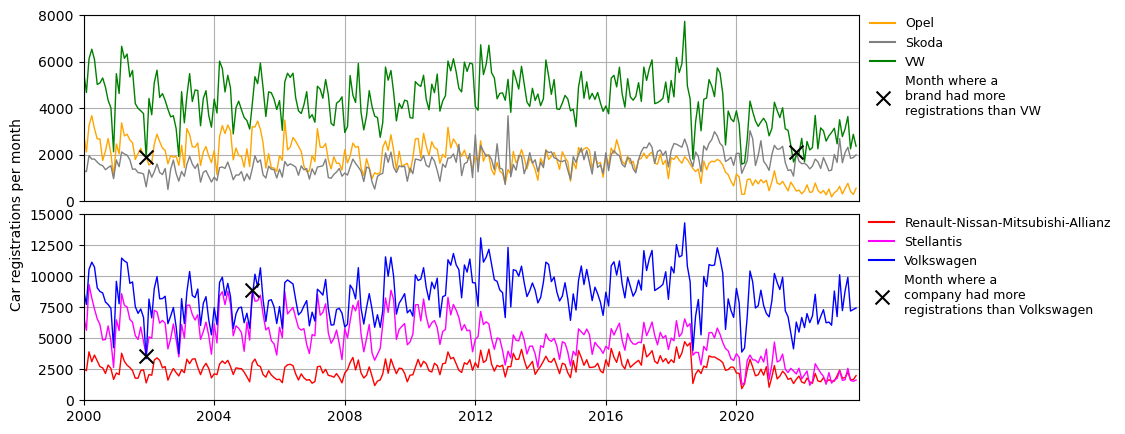

In [83]:
fig = plt.figure(figsize=(10,5))
#fig.suptitle(r'$\bf{Total}$ $\bf{new}$ $\bf{car}$ $\bf{registrations}$ $\bf{by}$ $\bf{brand/company}$'+'\n Brand (top); Company (bottom)', fontsize=10, x=0.04, ha='left')

gs = fig.add_gridspec(10, 10)
ax1 = fig.add_subplot(gs[:5,:])
ax2 = fig.add_subplot(gs[5:,:])

sns.lineplot(
    df[df['Pkw-Marken'].isin(top_brands)],
    x='Zeit (Monatswerte)',
    y='Anzahl Neuzulassungen',
    hue='Pkw-Marken',
    ax=ax1,
    linewidth=1,
    palette=['orange', 'grey', 'green'],
    )

more_than_vw = pd.DataFrame(columns=['Zeit (Monatswerte)', 'Anzahl Neuzulassungen'])
for brand_a in top_brands:
    if brand_a != brand_b:
        df_a = df[df['Pkw-Marken'] == brand_a].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        df_b = df[df['Pkw-Marken'] == 'VW'].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        for i in range(len(df_a)):
            if df_a.iloc[i] > df_b.iloc[i]:
                more_than_vw = pd.concat([more_than_vw, pd.DataFrame({'Zeit (Monatswerte)': [df_a.index[i]], 'Anzahl Neuzulassungen': [df_a.iloc[i]]})])

sns.scatterplot(
    x=more_than_vw['Zeit (Monatswerte)'],
    y=more_than_vw['Anzahl Neuzulassungen'],
    ax=ax1,
    color='black',
    marker='x',
    s=100,
    zorder=10,
    linewidth=1.5,
    label='Month where a\nbrand had more\nregistrations than VW'
)

ax1.grid(axis='both')
ax1.set_axisbelow(True)
ax1.set_ylabel('Car registrations per month')
ax1.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False)
ax1.set_xlim(datetime.date(2000, 1, 1), datetime.date(2023, 9, 30))
ax1.set_ylim(0, 8000)
ax1.set_xlabel('')
ax1.set_ylabel('')

plot_df = company_df.groupby(['Company', 'Zeit (Monatswerte)'], as_index=False)['Anzahl Neuzulassungen'].sum()
sns.lineplot(
    plot_df[plot_df['Company'].isin(['Volkswagen', 'Stellantis', 'Renault-Nissan-Mitsubishi-Allianz'])],
    x='Zeit (Monatswerte)',
    y='Anzahl Neuzulassungen',
    hue='Company',
    ax=ax2,
    linewidth=1,
    palette=['red', 'magenta', 'blue'],
)

more_than_volkswagen = pd.DataFrame(columns=['Zeit (Monatswerte)', 'Anzahl Neuzulassungen'])
for brand_a in car_companies.keys():
    if brand_a != brand_b:
        df_a = company_df[company_df['Company'] == brand_a].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        df_b = company_df[company_df['Company'] == 'Volkswagen'].groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum()
        for i in range(len(df_a)):
            if df_a.iloc[i] > df_b.iloc[i]:
                more_than_volkswagen = pd.concat([more_than_volkswagen, pd.DataFrame({'Zeit (Monatswerte)': [df_a.index[i]], 'Anzahl Neuzulassungen': [df_a.iloc[i]]})])

sns.scatterplot(
    x=more_than_volkswagen['Zeit (Monatswerte)'],
    y=more_than_volkswagen['Anzahl Neuzulassungen'],
    ax=ax2,
    color='black',
    marker='x',
    s=100,
    zorder=10,
    linewidth=1.5,
    label='Month where a\ncompany had more\nregistrations than Volkswagen'
)

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.grid(axis='both')
ax2.set_axisbelow(True)
ax2.set_xlim(datetime.date(2000, 1, 1), datetime.date(2023, 9, 30))
ax2.set_ylim(0, 15000)

plt.subplots_adjust(wspace=0, hspace=0.5)
ax1.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05), ncol=1, fontsize=9, facecolor='white', framealpha=1, edgecolor='white')
lgd = ax2.legend(loc='upper right', bbox_to_anchor=(1.34, 1.05), ncol=1, fontsize=9, facecolor='white', framealpha=1, edgecolor='white')
plt.ylabel('Car registrations per month', y=1)
plt.xlabel('')

plt.savefig("hp1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### E3-H2: "New car registrations exhibit seasonality. The number of car registrations during spring and summer are higher than in autumn and winter."





In [84]:
fig = px.bar(df_season, x='Zeit (Monatswerte)', y='Anzahl Neuzulassungen', color='Season', barmode='group')
fig.show()

In [85]:
differences = []

for year in df_season['Zeit (Monatswerte)'].unique():
    df_season_year = df_season[df_season['Zeit (Monatswerte)'] == year]
    summer = df_season_year[df_season_year['Season'] == 'Summer']['Anzahl Neuzulassungen'].values[0]
    autumn = df_season_year[df_season_year['Season'] == 'Autumn']['Anzahl Neuzulassungen'].values[0]
    winter = df_season_year[df_season_year['Season'] == 'Winter']['Anzahl Neuzulassungen'].values[0]
    spring = df_season_year[df_season_year['Season'] == 'Spring']['Anzahl Neuzulassungen'].values[0]
    diff = percent_difference(summer+spring, winter+autumn)
    differences.append(diff)
    print(f"{year} - Warm vs. Cold: {round(diff, 2)}%")
    
np.mean(differences), np.std(differences)

2000 - Warm vs. Cold: 34.7%
2001 - Warm vs. Cold: 39.34%
2002 - Warm vs. Cold: 28.65%
2003 - Warm vs. Cold: 23.96%
2004 - Warm vs. Cold: 29.08%
2005 - Warm vs. Cold: 34.94%
2006 - Warm vs. Cold: 30.68%
2007 - Warm vs. Cold: 26.53%
2008 - Warm vs. Cold: 29.59%
2009 - Warm vs. Cold: 34.7%
2010 - Warm vs. Cold: 22.17%
2011 - Warm vs. Cold: 15.38%
2012 - Warm vs. Cold: 28.51%
2013 - Warm vs. Cold: 19.75%
2014 - Warm vs. Cold: 13.01%
2015 - Warm vs. Cold: 18.22%
2016 - Warm vs. Cold: 14.34%
2017 - Warm vs. Cold: 14.61%
2018 - Warm vs. Cold: 47.92%
2019 - Warm vs. Cold: 33.53%
2020 - Warm vs. Cold: -14.77%
2021 - Warm vs. Cold: 35.6%
2022 - Warm vs. Cold: 6.19%
2023 - Warm vs. Cold: 123.21%


(28.743675625757486, 23.350218959510872)

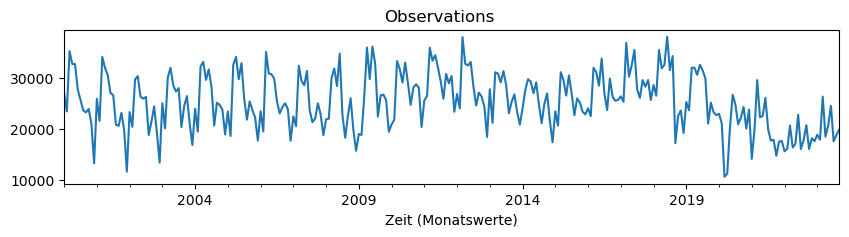

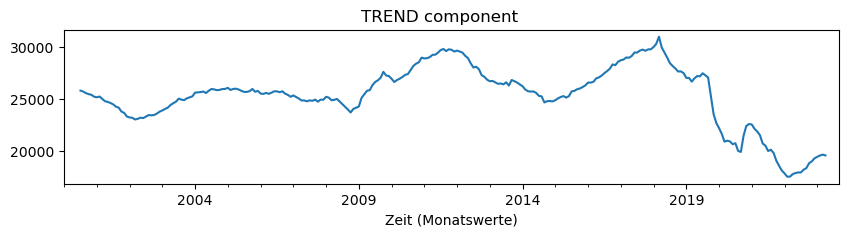

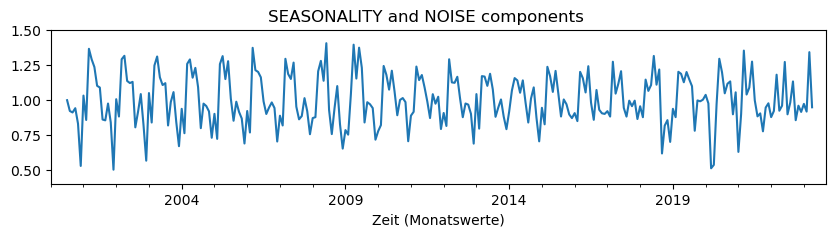

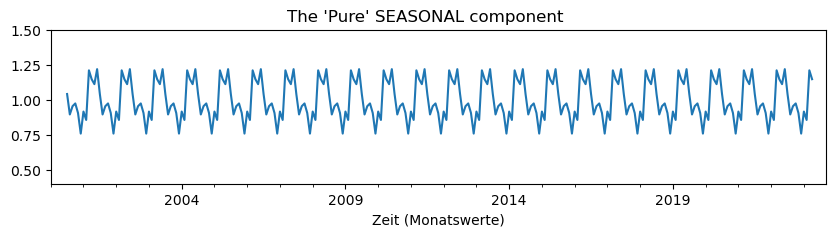

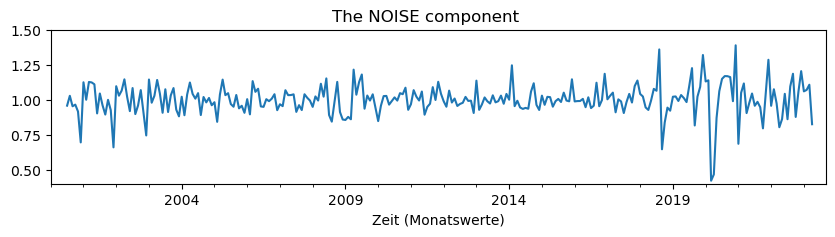

In [86]:
monthly = df.groupby('Zeit (Monatswerte)')['Anzahl Neuzulassungen'].sum().reset_index()
monthly['2 x 12 CMA (TREND)'] = monthly['Anzahl Neuzulassungen'].rolling(12, center=True).mean()
monthly.set_index('Zeit (Monatswerte)', inplace=True)

fig = plt.figure(figsize=(10,2))
fig.suptitle('Observations')
monthly['Anzahl Neuzulassungen'].plot()
plt.show()

fig = plt.figure(figsize=(10,2))
fig.suptitle('TREND component')
monthly['2 x 12 CMA (TREND)'].plot()
plt.show()

monthly['SEASONALITY AND NOISE'] = monthly['Anzahl Neuzulassungen']/monthly['2 x 12 CMA (TREND)']

fig = plt.figure(figsize=(10,2))
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0.4, 1.5)
monthly['SEASONALITY AND NOISE'].plot()
plt.show()

monthly['MONTH'] = monthly.index.strftime('%m').astype(int)

average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

for i in range(0, monthly['SEASONALITY AND NOISE'].size):
    if math.isnan(monthly['SEASONALITY AND NOISE'][i]) is False:
        average_seasonal_values[monthly['MONTH'][i]] = average_seasonal_values[monthly['MONTH'][i]] + monthly['SEASONALITY AND NOISE'][i]
        average_seasonal_value_counts[monthly['MONTH'][i]] = average_seasonal_value_counts[monthly['MONTH'][i]] + 1

for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]


seasonality_values = np.empty(monthly['SEASONALITY AND NOISE'].size)
seasonality_values[:] = np.nan
for i in range(0, monthly['SEASONALITY AND NOISE'].size):
    if math.isnan(monthly['SEASONALITY AND NOISE'][i]) is False:
        seasonality_values[i] = average_seasonal_values[monthly['MONTH'][i]]

monthly['SEASONALITY'] = seasonality_values

fig = plt.figure(figsize=(10,2))
fig.suptitle('The \'Pure\' SEASONAL component')
plt.ylim(0.4, 1.5)
monthly['SEASONALITY'].plot()
plt.show()

monthly['NOISE'] = monthly['SEASONALITY AND NOISE']/monthly['SEASONALITY']


fig = plt.figure(figsize=(10,2))
fig.suptitle('The NOISE component')
plt.ylim(0.4, 1.5)
monthly['NOISE'].plot()
plt.show()

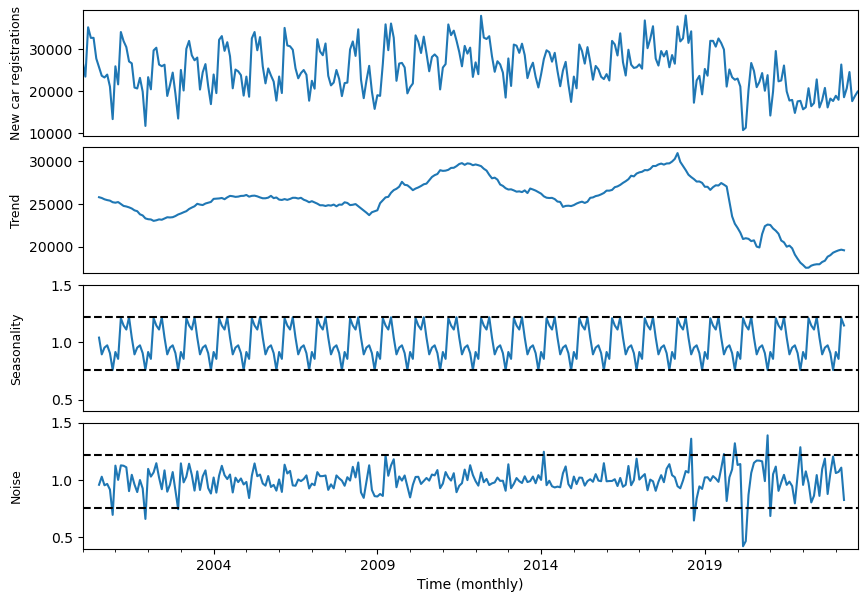

In [87]:
fig = plt.figure(figsize=(10, 7))

gs = fig.add_gridspec(8, 10)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2:4,:], sharex=ax1)
ax3 = fig.add_subplot(gs[4:6,:], sharex=ax1)
ax4 = fig.add_subplot(gs[6:,:], sharex=ax1)

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

monthly['Anzahl Neuzulassungen'].plot(ax=ax1)
monthly['2 x 12 CMA (TREND)'].plot(ax=ax2)
monthly['SEASONALITY'].plot(ax=ax3)
monthly['NOISE'].plot(ax=ax4)

for ax in [ax3, ax4]:
    ax.axhline(y=monthly['SEASONALITY'].max(), color='black', linestyle='--')
    ax.axhline(y=monthly['SEASONALITY'].min(), color='black', linestyle='--')

ax3.set_ylim(0.4, 1.5)
ax4.set_ylim(0.4, 1.5)

ax1.set_ylabel('New car registrations', fontsize=9)
ax2.set_ylabel('Trend', fontsize=9)
ax3.set_ylabel('Seasonality', fontsize=9)
ax4.set_ylabel('Noise', fontsize=9)
ax4.set_xlabel('Time (monthly)')

fig.align_ylabels()

fig.savefig('hp2_1.png', bbox_inches='tight')

#fig.show()

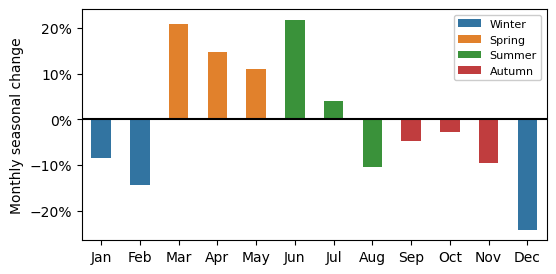

In [88]:
import matplotlib.ticker as mtick

plot_area = monthly['SEASONALITY'][12:24].reset_index()
plot_area['label'] = ["Winter", "Winter", "Spring", "Spring", "Spring", "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn", "Winter"]

fig = plt.figure(figsize=(6, 3))
ax = plt.gca()

ax.axhline(y=0, color='black')
sns.barplot(
    x=plot_area['Zeit (Monatswerte)'].dt.strftime('%b'),
    y=(plot_area['SEASONALITY']-1)*100,
    hue=plot_area['label'],
    ax=ax,
    width=0.5,
    dodge=False,)

ax.set_xlabel('')
ax.set_ylabel('Monthly seasonal change')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=8, facecolor='white', framealpha=1)

fig.savefig('hp2_2.png', bbox_inches='tight')

### E3-H3: "The number of new car registrations in Austria is positively correlated with the country's economic conditions, measured by the GDP and the ATX."





In [89]:
df_corr = reg_with_econ[['Anzahl Neuzulassungen', 'GDP (per capita)', 'Disposable income (per capita)', 'ATX yearly mean']].copy()

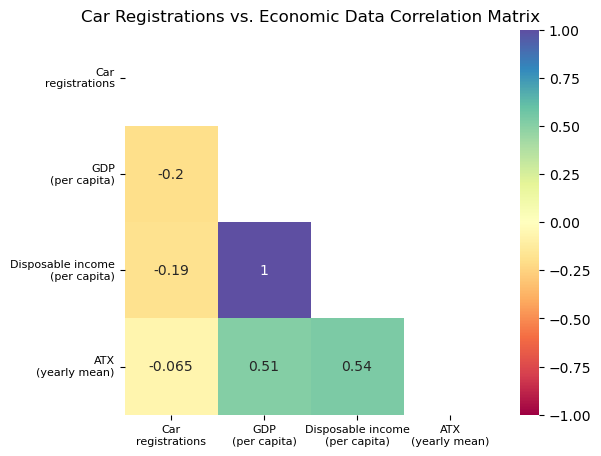

In [90]:
corr = df_corr.rename(columns={'Anzahl Neuzulassungen': 'Car\nregistrations', 'GDP (per capita)': 'GDP\n(per capita)', 'Disposable income (per capita)': 'Disposable income\n(per capita)', 'ATX yearly mean': 'ATX\n(yearly mean)'}).corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig = plt.figure(figsize=(6, 5))
sns.heatmap(corr, mask=mask, annot=True, #center=0, 
            vmin=-1, vmax=1,
            cmap=sns.color_palette("Spectral", as_cmap=True),# cbar_kws={"shrink": .8}
        )
plt.xticks(rotation=0, fontsize=8)
plt.yticks(fontsize=8)
plt.title('Car Registrations vs. Economic Data Correlation Matrix');

Text(0.5, 0, 'Year')

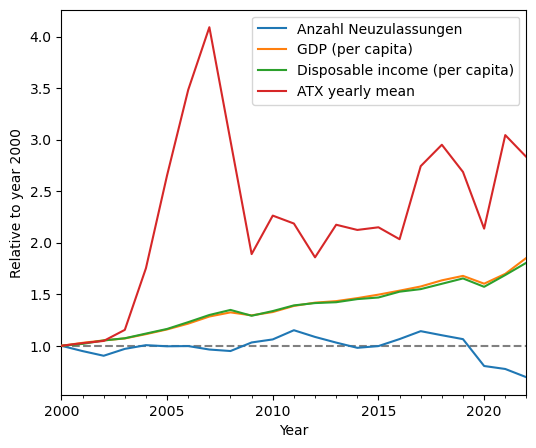

In [91]:
df_corr_base = df_corr.iloc[0]
df_corr_rel = df_corr/df_corr_base
df_corr_rel.index = pd.to_datetime(df_corr_rel.index, format='%Y')

fig = plt.figure(figsize=(6, 5))
ax = plt.gca()
df_corr_rel.plot(zorder=3, ax=ax)
ax.axhline(y=1, color='grey', linestyle='--', zorder=0)
ax.set_ylabel('Relative to year 2000')
ax.set_xlabel('Year')

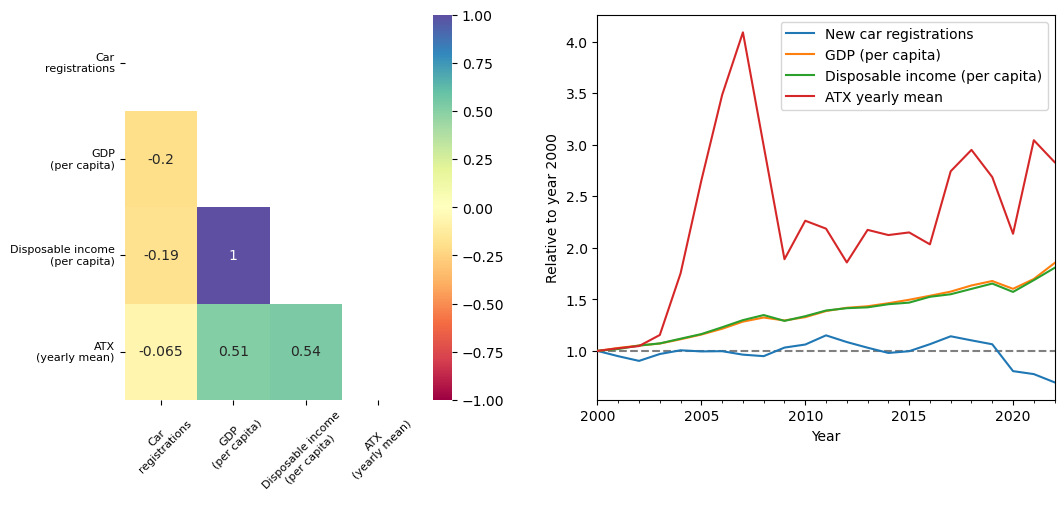

In [92]:
fig = plt.figure(figsize=(12, 5))

gs = fig.add_gridspec(10, 10)
ax1 = fig.add_subplot(gs[:,:4])
ax2 = fig.add_subplot(gs[:,5:])

sns.heatmap(corr, mask=mask, annot=True, #center=0, 
            vmin=-1, vmax=1,
            cmap=sns.color_palette("Spectral", as_cmap=True),
            ax=ax1,
        )
#plt.xticks(rotation=0, fontsize=8)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, fontsize=8)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=8)
#plt.yticks(fontsize=8)

df_corr_rel.rename(columns={'Anzahl Neuzulassungen': 'New car registrations'}, inplace=True)
df_corr_rel.plot(zorder=3, ax=ax2)
ax2.axhline(y=1, color='grey', linestyle='--', zorder=0)
ax2.set_ylabel('Relative to year 2000')
ax2.set_xlabel('Year')

plt.savefig("hp3.png", bbox_inches='tight');

# Sources

[1] https://www.wetteronline.de/wetterlexikon/jahreszeiten (27.10.2023, 16:15 Uhr)

[2] https://www.statistik.at/en/statistics/national-economy-and-public-finance/national-accounts/gross-domestic-product-and-main-aggregates (28.10.2023, 11:24 Uhr)

[3] https://www.wienerborse.at/en/indices/index-values/historical-data/?ISIN=AT0000999982 (28.10.2023, 13:20 Uhr)

[4] https://www.data.gv.at/katalog/dataset/1446c895-cd1f-3ed4-8dd2-66fee300c16e (27.10.2023, 18:12 Uhr)

[5] https://www.trackdays.co.uk/infographic/your-guide-who-owns-which-car-brands-2018/ (27.10.2023, 15:00 Uhr)

[6] https://www.volkswagen-group.com/en/brands-15811 (27.10.2023, 15:00 Uhr)

[7] https://en.wikipedia.org/wiki/PSA_Group (27.10.2023, 15:10 Uhr)

[8] https://en.wikipedia.org/wiki/Stellantis (27.10.2023, 15:10 Uhr)

[9] https://en.wikipedia.org/wiki/Mercedes-Benz_Group (27.10.2023, 15:25 Uhr)

[11] https://de.wikipedia.org/wiki/Renault-Nissan-Mitsubishi-Allianz (27.10.2023, 15:45 Uhr)

[12] https://de.wikipedia.org/wiki/Hyundai_Motor_Group (27.10.2023, 15:50 Uhr)

[13] https://www.investopedia.com/articles/company-insights/091516/most-profitable-auto-companies-2016-tm-gm.asp (27.10.2023, 14:30 Uhr)